### $\int \omega(\theta)d\theta$ vs $K_{abs}$

R-squared: 0.932
R-squared: 0.880
R-squared: 0.963


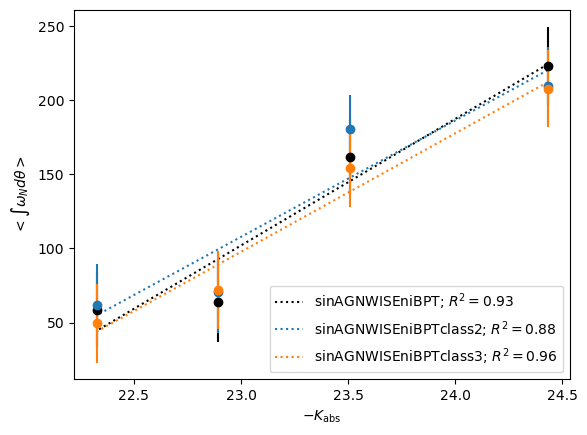

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import ascii

nquant = int(4)
nbootstrap = int(100)

fig, ax = plt.subplots()


for sample, color in zip(['sinAGNWISEniBPT','sinAGNWISEniBPTclass2','sinAGNWISEniBPTclass3'],['k','C00','C01']):

    filename = f'../data/int_K_nq{nquant}_nbs{nbootstrap}_{sample}.npz'


    data = ascii.read(filename)

    from scipy import stats

    meanMag = data['meanMag']
    int_mean = data['int_mean']
    int_std = data['int_std']

    res = stats.linregress(-meanMag, int_mean)
    print(f"R-squared: {res.rvalue**2:.3f}")

    ax.plot(-meanMag, res.intercept - res.slope*meanMag, ls=':',c=color,\
            label=f'{sample}; '+r'$R^2=$'+f'{res.rvalue**2:.2f}')

    for i in range(len(int_mean)):
        ax.errorbar(-meanMag[i],int_mean[i],yerr=int_std[i],c=color,fmt='o')


ax.set_ylabel(r'$<\int\omega_Nd\theta>$')
ax.set_xlabel(r'$-K_{\mathrm{abs}}$')

ax.legend(loc=4)

plt.savefig(f'../plots/int_K_nq{nquant}_nbs{nbootstrap}_comparison.png')

plt.show()



### Autocorrelations

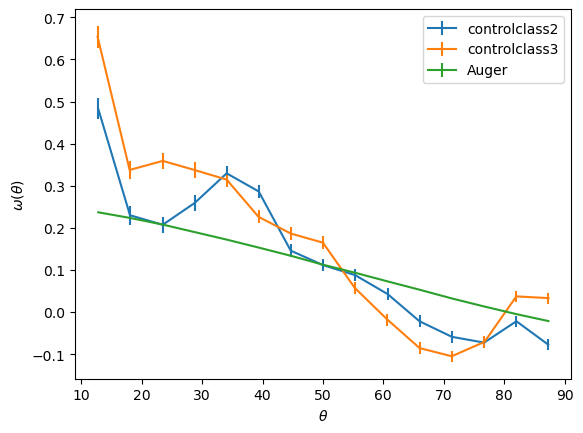

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import ascii

nquant = int(4)
nbootstrap = int(100)

fig, ax = plt.subplots()


for sample, color in zip(['controlclass2','controlclass3','Auger'],['C00','C01','C02']):

    try:
        filename = f'../data/autoCorr_nbs{nbootstrap}_{sample}.npz'
        data = ascii.read(filename)

    except FileNotFoundError:
        filename = f'../data/autoCorr_nbs50_{sample}.npz'
        data = ascii.read(filename)


    from scipy import stats

    xi_mean = data['xi_mean']
    varxi = data['varxi']
    theta = data['theta']

    ax.errorbar(theta,xi_mean,yerr=np.sqrt(varxi),c=color,fmt='-',label=sample)


ax.set_ylabel(r'$\omega(\theta)$')
ax.set_xlabel(r'$\theta$')

ax.legend()

plt.savefig(f'../plots/autoCorr_nbs{nbootstrap}_comparison.png')

plt.show()



##### Redshift distributions

308
1009


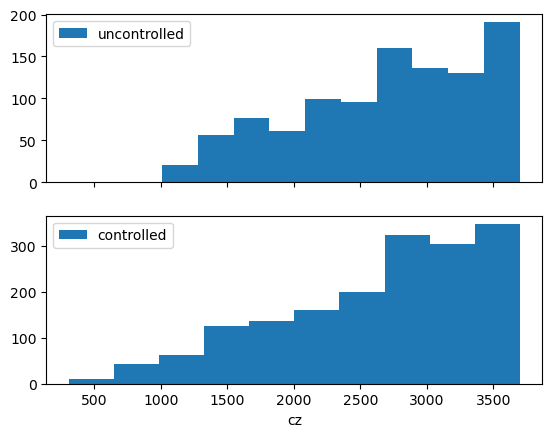

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import ascii

nquant = int(4)
nbootstrap = int(100)

filename_u = '../data/2MRSxWISE_VLS_d1d5_sinAGNWISEniBPT.txt'
filename_c = '../data/2MRSxWISE_VLS_d1d5_sinAGNWISEniBPT_control_SF_passive_cz_Kabs_ang5_cz1000.txt'

uncontrolled = ascii.read(filename_u)
controlled = ascii.read(filename_c)

print(uncontrolled['cz'].min())
print(controlled['cz'].min())

fig, axs = plt.subplots(2, sharex=True)

axs[0].hist(controlled['cz'],label='controlled')
axs[1].hist(uncontrolled['cz'],label='uncontrolled')

axs[1].set_xlabel('cz')
#ax.set_ylabel(r'$\omega(\theta)$')
#ax.set_xlabel(r'$\theta$')

axs[0].legend()
axs[1].legend()

#plt.savefig(f'../plots/autoCorr_nbs{nbootstrap}_comparison.png')

plt.show()



### Autocorrelations UNCONTROLLED samples

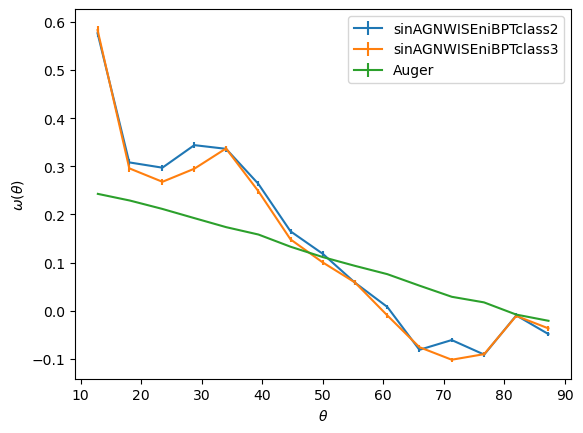

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import ascii

nquant = int(4)
nbootstrap = int(100)

fig, ax = plt.subplots()


for sample, color in zip(['sinAGNWISEniBPTclass2','sinAGNWISEniBPTclass3','Auger'],['C00','C01','C02']):

    try:
        filename = f'../data/autoCorr_nbs{nbootstrap}_{sample}.npz'
        data = ascii.read(filename)

    except FileNotFoundError:
        filename = f'../data/autoCorr_nbs50_{sample}.npz'
        data = ascii.read(filename)


    from scipy import stats

    xi_mean = data['xi_mean']
    varxi = data['varxi']
    theta = data['theta']

    ax.errorbar(theta,xi_mean,yerr=np.sqrt(varxi),c=color,fmt='-',label=sample)


ax.set_ylabel(r'$\omega(\theta)$')
ax.set_xlabel(r'$\theta$')

ax.legend()

plt.savefig(f'../plots/autoCorr_nbs{nbootstrap}_nocontrol_comparison.png')

plt.show()



## NEW SAMPLES: Controlled ang5 and z, free K

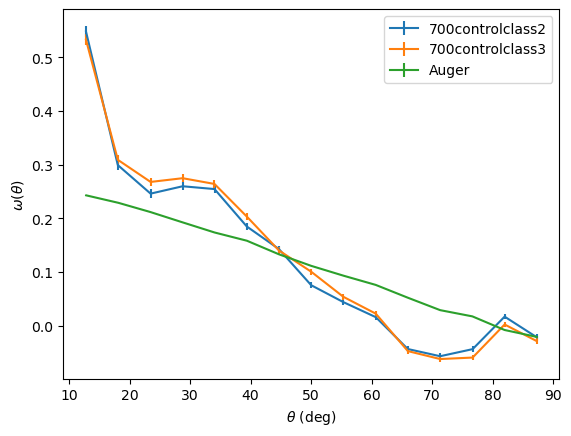

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import ascii

nquant = int(4)
nbootstrap = int(100)

fig, ax = plt.subplots()


for sample, color in zip(['700controlclass2','700controlclass3','Auger'],['C00','C01','C02']):

    try:
        filename = f'../data/autoCorr_nbs{nbootstrap}_{sample}.npz'
        data = ascii.read(filename)

    except FileNotFoundError:
        filename = f'../data/autoCorr_nbs50_{sample}.npz'
        data = ascii.read(filename)


    from scipy import stats

    xi_mean = data['xi_mean']
    varxi = data['varxi']
    theta = data['theta']

    ax.errorbar(theta,xi_mean,yerr=np.sqrt(varxi),c=color,fmt='-',label=sample)


ax.set_ylabel(r'$\omega(\theta)$')
ax.set_xlabel(r'$\theta$ (deg)')

ax.legend()

plt.savefig(f'../plots/autoCorr_nbs{nbootstrap}_700control_comparison.png')
plt.show()



Slope:  13.59597686824081
Slope:  14.883798014258803
Slope:  11.56514630718204
Slope:  15.847481571634226


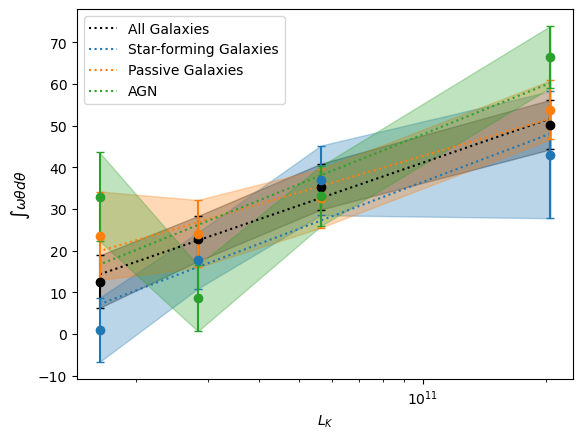

In [29]:
def bootstrap_ci(x, y, x_err, y_err, n_bootstrap=10000, ci=95):

    corr_samples = []

    for _ in range(n_bootstrap):
        # Perturb data within errors
        x_sample = np.random.normal(x, x_err)
        y_sample = np.random.normal(y, y_err)
        corr = stats.pearsonr(x_sample, y_sample)[0]
        corr_samples.append(corr)

    # 95% Confidence Interval
    p_low = (100 - ci) / 2
    p_high = 100 - p_low
    lower, upper = np.percentile(corr_samples, [p_low, p_high])

    return lower, upper

import matplotlib.pyplot as plt
import numpy as np
from astropy.io import ascii

nquant = int(4)
nbootstrap = int(500)
maxsep = int(25)

fig, ax = plt.subplots()

samples = ['700control','700controlclass2','700controlclass3','agn']
colors = ['k','C00','C01','C02']
label_map = {
    '700control': 'All Galaxies',
    '700controlclass2': 'Star-forming Galaxies',
    '700controlclass3': 'Passive Galaxies',
    'agn': 'AGN'
}
for sample, color in zip(samples,colors):

    filename = f'../data/int{maxsep}_K_nq{nquant}_nbs{nbootstrap}_{sample}.npz'

    data = ascii.read(filename)

    from scipy import stats

    meanMag = data['meanMag']
    int_mean = data['int_mean']
    int_std = data['int_std']
    L = 10**(-.4*(meanMag-3.28))  # Convert meanMag to L

    res_lr = stats.linregress(-meanMag, (int_mean))
    # res_prs = stats.pearsonr(np.log10(L), int_mean)
    # ci90 = bootstrap_ci(np.log10(L), int_mean, 0, int_std, n_bootstrap=10000, ci=90)
    # pearson_mean = res_prs.statistic
    # pearson_ci = pearson_mean-ci90[0]

    # print(f"Sample: {sample}")
    # print(f"R-squared: {res_lr.rvalue**2:.3f}")
    # print(f"Pearson R: {res_prs.statistic:.3f}")
    # print(f"p-value: {res_prs.pvalue:.3f}")
    # print(f"90% CI: ({ci90[0]:.3f}, {ci90[1]:.3f})")

    #label = f'{sample}; '+r'$R^2=$'+f'{res_lr.rvalue**2:.2f}'
    #label = f'{sample}; '+r'$\rho=$'+f'{res_prs.statistic:.2f}; '+r'$p=$'+f'{res_prs.pvalue:.2f}'
    #label = f'{sample}; '+r'$\rho=$'+f'{res_prs.statistic:.2f}'+r'$\pm$'+f'{pearson_ci:.2f}'
    label = label_map[sample]

    #ax.plot(-meanMag, res_lr.intercept - res_lr.slope*meanMag, ls=':',c=color,\
    #        label=label)
    ax.plot(L, res_lr.intercept - res_lr.slope*meanMag, ls=':',c=color,\
            label=label)
    
    print('Slope: ',res_lr.slope)

    #for i in range(len(int_mean)):
    ax.errorbar(L,int_mean,yerr=int_std,c=color,fmt='o',capsize=3)
    #ax.scatter(-meanMag,int_mean,c=color,marker='o')
    ax.fill_between(L,y1=int_mean-int_std,y2=int_mean+int_std,color=color,alpha=.3)

ax.set_xscale('log')
#ax.set_yscale('log')

ax.set_ylabel(r'$\int\omega\theta d\theta$')
#ax.set_xlabel(r'$-K_{\mathrm{abs}}$')
ax.set_xlabel(r'$L_K$')

ax.legend(loc=0)

plt.savefig(f'../plots/int_K_nq{nquant}_nbs{nbootstrap}_700control_comparison.png', dpi=300)

plt.show()



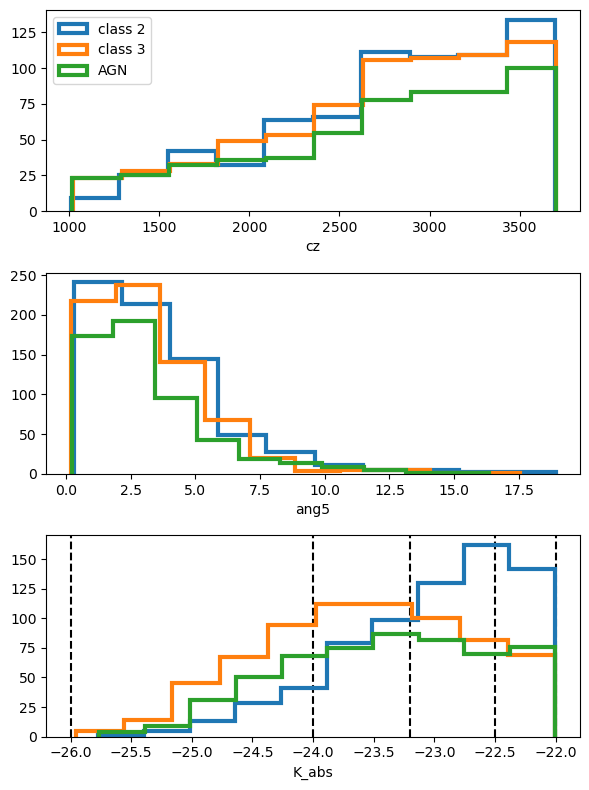

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import ascii

nquant = int(4)
nbootstrap = int(100)

filename = '../data/VLS_ang5_cz_700control.txt'
filenameAGN = '../data/VLS_WISEorBPT_AGNs.txt'

data = ascii.read(filename)
data2 = data[data['class']==2]
data3 =  data[data['class']==3]
dataAGN = ascii.read(filenameAGN)

fig, axs = plt.subplots(3, sharex=False, figsize=(6, 8))

# Redshift
axs[0].hist(data2['cz'],label='class 2',histtype='step',color='C00',linewidth=3)
axs[0].hist(data3['cz'],label='class 3',histtype='step',color='C01',linewidth=3)
axs[0].hist(dataAGN['cz'],label='AGN',histtype='step',color='C02',linewidth=3)

# Ang5
axs[1].hist(data2['ang5'],label='class 2',histtype='step',color='C00',linewidth=3)
axs[1].hist(data3['ang5'],label='class 3',histtype='step',color='C01',linewidth=3)
axs[1].hist(dataAGN['ang5'],label='AGN',histtype='step',color='C02',linewidth=3)

# K

# nq = 4
# quantiles2 = np.quantile(data2['K_abs'], np.linspace(0, 1, nq+1))
# quantiles3 = np.quantile(data3['K_abs'], np.linspace(0, 1, nq+1))
# axs[2].vlines(quantiles2, ymin=0, ymax=.3, color='C00', linestyle='--', transform=axs[2].get_xaxis_transform())

bines = np.array([-26,-24,-23.2,-22.5,-22.])
axs[2].vlines(bines, ymin=0, ymax=1, color='k', linestyle='--', transform=axs[2].get_xaxis_transform())

axs[2].hist(data2['K_abs'],label='class 2',histtype='step',color='C00',linewidth=3)
axs[2].hist(data3['K_abs'],label='class 3',histtype='step',color='C01',linewidth=3)
axs[2].hist(dataAGN['K_abs'],label='AGN',histtype='step',color='C02',linewidth=3)

# Lables
axs[0].set_xlabel('cz')
axs[1].set_xlabel('ang5')
axs[2].set_xlabel('K_abs')

#ax.set_ylabel(r'$\omega(\theta)$')
#ax.set_xlabel(r'$\theta$')

axs[0].legend()

plt.tight_layout()
plt.savefig(f'../plots/variables_700control.png')
plt.show()


### Plot 4x4 para poner los histogramas y la autocorrelación

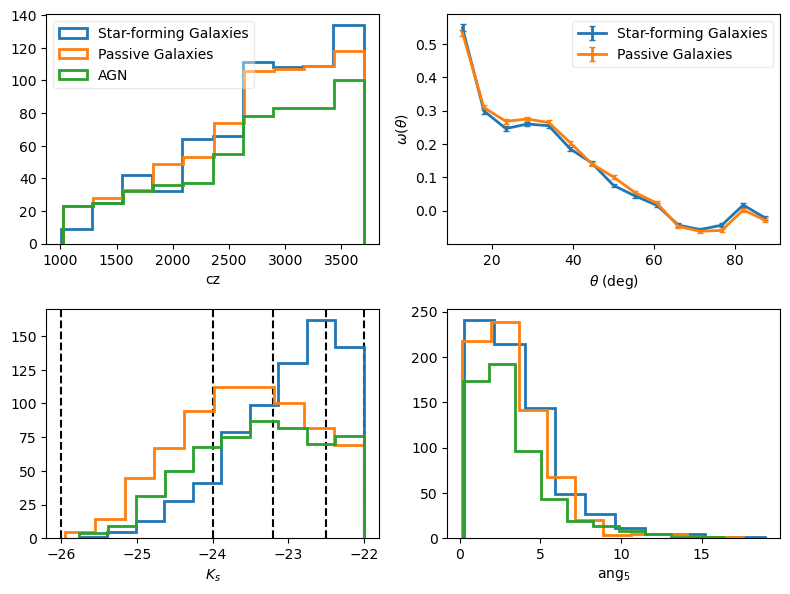

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import ascii

linewidth = 2

nquant = int(4)
nbootstrap = int(100)

filename = '../data/VLS_ang5_cz_700control.txt'
filenameAGN = '../data/VLS_WISEorBPT_AGNs.txt'

data = ascii.read(filename)
data2 = data[data['class']==2]
data3 =  data[data['class']==3]
dataAGN = ascii.read(filenameAGN)

fig, axs = plt.subplots(2,2, sharex=False, figsize=(8, 6))

# Redshift
axs[0,0].hist(data2['cz'],label='Star-forming Galaxies',histtype='step',color='C00',linewidth=linewidth)
axs[0,0].hist(data3['cz'],label='Passive Galaxies',histtype='step',color='C01',linewidth=linewidth)
axs[0,0].hist(dataAGN['cz'],label='AGN',histtype='step',color='C02',linewidth=linewidth)

# Ang5
axs[1,1].hist(data2['ang5'],label='class 2',histtype='step',color='C00',linewidth=linewidth)
axs[1,1].hist(data3['ang5'],label='class 3',histtype='step',color='C01',linewidth=linewidth)
axs[1,1].hist(dataAGN['ang5'],label='AGN',histtype='step',color='C02',linewidth=linewidth)

# K
bines = np.array([-26,-24,-23.2,-22.5,-22.])
axs[1,0].vlines(bines, ymin=0, ymax=1, color='k', linestyle='--', transform=axs[1,0].get_xaxis_transform())
axs[1,0].hist(data2['K_abs'],label='class 2',histtype='step',color='C00',linewidth=linewidth)
axs[1,0].hist(data3['K_abs'],label='class 3',histtype='step',color='C01',linewidth=linewidth)
axs[1,0].hist(dataAGN['K_abs'],label='AGN',histtype='step',color='C02',linewidth=linewidth)

# Lables
axs[0,0].set_xlabel('cz')
axs[1,1].set_xlabel(r'$\mathrm{ang}_5$')
axs[1,0].set_xlabel(r'$K_s$')


# Auto Correlation
nquant = int(4)
nbootstrap = int(100)
label_map = {
    '700controlclass2': 'Star-forming Galaxies',
    '700controlclass3': 'Passive Galaxies',
}
for sample, color in zip(['700controlclass2','700controlclass3'],['C00','C01']):

    try:
        filename = f'../data/autoCorr_nbs{nbootstrap}_{sample}.npz'
        data = ascii.read(filename)

    except FileNotFoundError:
        filename = f'../data/autoCorr_nbs50_{sample}.npz'
        data = ascii.read(filename)

    from scipy import stats

    xi_mean = data['xi_mean']
    varxi = data['varxi']
    theta = data['theta']

    label = label_map[sample]
    axs[0,1].errorbar(theta,xi_mean,yerr=np.sqrt(varxi),c=color,fmt='-',label=label,linewidth=linewidth,capsize=2)

axs[0,1].legend(loc=0,framealpha=.4)

axs[0,1].set_ylabel(r'$\omega(\theta)$')
axs[0,1].set_xlabel(r'$\theta\;\mathrm{(deg)}$')

axs[0,0].legend(framealpha=.4)

plt.tight_layout()
plt.savefig(f'../plots/controlled_variables.png', dpi=300)
plt.show()


#### All gxs (no AGN)

R-squared: 0.911


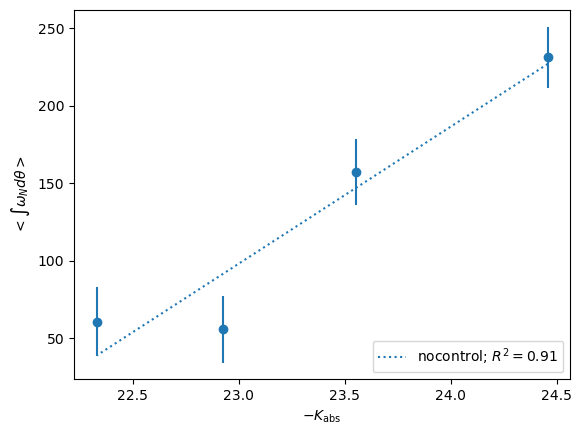

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import ascii

nquant = int(4)
nbootstrap = int(100)

fig, ax = plt.subplots()


for sample, color in zip(['nocontrol'],['C00']):

    filename = f'../data/int_K_nq{nquant}_nbs{nbootstrap}_{sample}.npz'


    data = ascii.read(filename)

    from scipy import stats

    meanMag = data['meanMag']
    int_mean = data['int_mean']
    int_std = data['int_std']

    res = stats.linregress(-meanMag, int_mean)
    print(f"R-squared: {res.rvalue**2:.3f}")

    ax.plot(-meanMag, res.intercept - res.slope*meanMag, ls=':',c=color,\
            label=f'{sample}; '+r'$R^2=$'+f'{res.rvalue**2:.2f}')

    for i in range(len(int_mean)):
        ax.errorbar(-meanMag[i],int_mean[i],yerr=int_std[i],c=color,fmt='o')


ax.set_ylabel(r'$<\int\omega\theta d\theta>$')
ax.set_xlabel(r'$-K_{\mathrm{abs}}$')

ax.legend(loc=4)

plt.savefig(f'../plots/int_K_nq{nquant}_nbs{nbootstrap}_nocontrol_comparison.png')

plt.show()



### High and Low Deflection

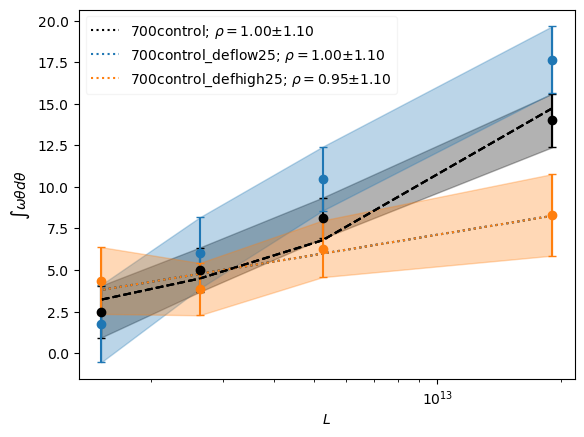

In [20]:
def bootstrap_ci(x, y, x_err, y_err, n_bootstrap=10000, ci=95):

    corr_samples = []

    for _ in range(n_bootstrap):
        # Perturb data within errors
        x_sample = np.random.normal(x, x_err)
        y_sample = np.random.normal(y, y_err)
        corr = stats.pearsonr(x_sample, y_sample)[0]
        corr_samples.append(corr)

    # 95% Confidence Interval
    p_low = (100 - ci) / 2
    p_high = 100 - p_low
    lower, upper = np.percentile(corr_samples, [p_low, p_high])

    return lower, upper

import matplotlib.pyplot as plt
import numpy as np
from astropy.io import ascii

nquant = int(4)
nbootstrap = int(500)
maxsep = int(12)

fig, ax = plt.subplots()

samples = ['700control','700control_deflow25','700control_defhigh25']
colors = ['k','C00','C01']

for sample, color in zip(samples,colors):

    filename = f'../data/int{maxsep}_K_nq{nquant}_nbs{nbootstrap}_{sample}.npz'

    data = ascii.read(filename)

    from scipy import stats

    meanMag = data['meanMag']
    int_mean = data['int_mean']
    int_std = data['int_std']

    #res_lr = stats.linregress(-meanMag, int_mean)
    res_prs = stats.pearsonr(-meanMag, int_mean)
    # ci90 = bootstrap_ci(-meanMag, int_mean, 0, int_std, n_bootstrap=10000, ci=90)
    # pearson_mean = res_prs.statistic
    # pearson_ci = pearson_mean-ci90[0]

    # print(f"Sample: {sample}")
    # print(f"R-squared: {res_lr.rvalue**2:.3f}")
    # print(f"Pearson R: {res_prs.statistic:.3f}")
    # print(f"p-value: {res_prs.pvalue:.3f}")
    # print(f"90% CI: ({ci90[0]:.3f}, {ci90[1]:.3f})")

    #label = f'{sample}; '+r'$R^2=$'+f'{res_lr.rvalue**2:.2f}'
    #label = f'{sample}; '+r'$\rho=$'+f'{res_prs.statistic:.2f}; '+r'$p=$'+f'{res_prs.pvalue:.2f}'
    label = f'{sample}; '+r'$\rho=$'+f'{res_prs.statistic:.2f}'+r'$\pm$'+f'{pearson_ci:.2f}'

    #ax.plot(-meanMag, res_lr.intercept - res_lr.slope*meanMag, ls=':',c=color,\
    #        label=label)
    ax.plot(10**(-.4*meanMag+3.28), res_lr.intercept - res_lr.slope*meanMag, ls=':',c=color,\
            label=label)
    
    #for i in range(len(int_mean)):
    ax.errorbar(10**(-.4*meanMag+3.28),int_mean,yerr=int_std,c=color,fmt='o',capsize=3)
    #ax.scatter(-meanMag,int_mean,c=color,marker='o')
    ax.fill_between(10**(-.4*meanMag+3.28),y1=int_mean-int_std,y2=int_mean+int_std,color=color,alpha=.3)
    x = (10**(-.4*meanMag+3.28))
    y = 10*(x/1E13)**.6
    ax.plot(x,y, ls='--', c='k') 

ax.set_xscale('log')

ax.set_ylabel(r'$\int\omega\theta d\theta$')
ax.set_xlabel(r'$L$')

ax.legend(loc=0,framealpha=.2)

plt.savefig(f'../plots/int_K_nq{nquant}_nbs{nbootstrap}_deflection.png')

plt.show()



### Integral de las low deflection vs L**0.5

Sample: 700control
R-squared: 0.984
Pearson R: 0.992
p-value: 0.008
90% CI: (0.852, 0.998)
13.59597686824081
Sample: 700control_deflow25
R-squared: 0.993
Pearson R: 0.996
p-value: 0.004
90% CI: (0.866, 0.998)
20.604565806073005


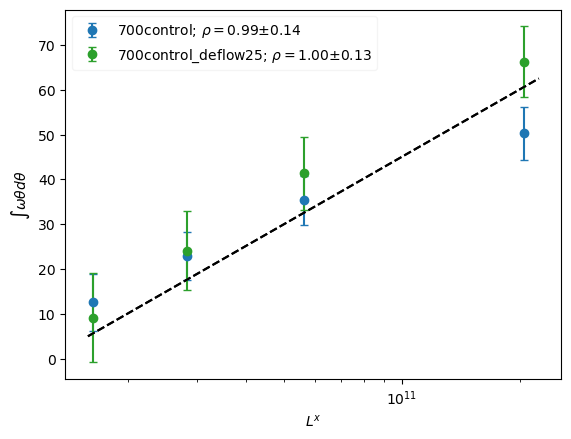

In [74]:
def bootstrap_ci(x, y, x_err, y_err, n_bootstrap=10000, ci=95):

    corr_samples = []

    for _ in range(n_bootstrap):
        # Perturb data within errors
        x_sample = np.random.normal(x, x_err)
        y_sample = np.random.normal(y, y_err)
        corr = stats.pearsonr(x_sample, y_sample)[0]
        corr_samples.append(corr)

    # 95% Confidence Interval
    p_low = (100 - ci) / 2
    p_high = 100 - p_low
    lower, upper = np.percentile(corr_samples, [p_low, p_high])

    return lower, upper

import matplotlib.pyplot as plt
import numpy as np
from astropy.io import ascii

nquant = int(4)
nbootstrap = int(500)
maxsep = int(25)

fig, ax = plt.subplots()

samples = ['700control','700control_deflow25']
colors = ['C00','C02']

for sample, color in zip(samples,colors):

    filename = f'../data/int{maxsep}_K_nq{nquant}_nbs{nbootstrap}_{sample}.npz'

    data = ascii.read(filename)

    from scipy import stats

    meanMag = data['meanMag']
    int_mean = data['int_mean']
    int_std = data['int_std']

    res_lr = stats.linregress(-meanMag, int_mean)
    res_prs = stats.pearsonr(-meanMag, int_mean)
    ci90 = bootstrap_ci(-meanMag, int_mean, 0, int_std, n_bootstrap=10000, ci=90)
    pearson_mean = res_prs.statistic
    pearson_ci = pearson_mean-ci90[0]

    print(f"Sample: {sample}")
    print(f"R-squared: {res_lr.rvalue**2:.3f}")
    print(f"Pearson R: {res_prs.statistic:.3f}")
    print(f"p-value: {res_prs.pvalue:.3f}")
    print(f"90% CI: ({ci90[0]:.3f}, {ci90[1]:.3f})")

    #label = f'{sample}; '+r'$R^2=$'+f'{res_lr.rvalue**2:.2f}'
    #label = f'{sample}; '+r'$\rho=$'+f'{res_prs.statistic:.2f}; '+r'$p=$'+f'{res_prs.pvalue:.2f}'
    label = f'{sample}; '+r'$\rho=$'+f'{res_prs.statistic:.2f}'+r'$\pm$'+f'{pearson_ci:.2f}'

    #ax.plot(-meanMag, res_lr.intercept - res_lr.slope*meanMag, ls=':',c=color,\
    #        label=label)

    x = (10**(-.4*(meanMag-3.28)))**1
    #x = -meanMag
    #ax.plot(x, res_lr.intercept - res_lr.slope*meanMag, ls=':',c=color,\
    #        label=label)
    
    print(res_lr.slope)
    #for i in range(len(int_mean)):
    ax.errorbar(x,int_mean,yerr=int_std,c=color,fmt='o',capsize=3,label=label)
    #ax.scatter(-meanMag,int_mean,c=color,marker='o')
    #ax.fill_between(x,y1=int_mean-int_std,y2=int_mean+int_std,color=color,alpha=.3)

    x = 10**(-.4*(meanMag-3.28))
    y = 40*(x/1E11)**(.5)
    y = .5*(x-1e11)+40

    # Parameters
    slope = 50
    x0 = 1e11
    y0 = 45
    b = y0 - slope * np.log10(x0)

    # X range in log scale
    x = np.logspace(10.2, 11.35, 500)
    y = slope * np.log10(x) + b
    ax.plot(x,y, ls='--', c='k') 

    # x = 10**(-.4*(meanMag-3.28))+10**.1
    # y = 50*(x/1E11)**.5
    # ax.plot(x,y, ls='--', c='k') 

    # x = 10**(-.4*(meanMag-3.28))-10**.1
    # y = 50*(x/1E11)**.5
    # ax.plot(x,y, ls='--', c='k') 
    #plt.errorbar(1e11,50*(1e11/1E11)**(.5),xerr=)

ax.set_xscale('log')

ax.set_ylabel(r'$\int\omega\theta d\theta$')
ax.set_xlabel(r'$L^{x}$')

ax.legend(loc=0,framealpha=.2)

#plt.savefig(f'../plots/int_K_nq{nquant}_nbs{nbootstrap}_deflection.png')

plt.show()



In [ ]:
def bootstrap_ci(x, y, x_err, y_err, n_bootstrap=10000, ci=95):

    corr_samples = []

    for _ in range(n_bootstrap):
        # Perturb data within errors
        x_sample = np.random.normal(x, x_err)
        y_sample = np.random.normal(y, y_err)
        corr = stats.pearsonr(x_sample, y_sample)[0]
        corr_samples.append(corr)

    # 95% Confidence Interval
    p_low = (100 - ci) / 2
    p_high = 100 - p_low
    lower, upper = np.percentile(corr_samples, [p_low, p_high])

    return lower, upper

import matplotlib.pyplot as plt
import numpy as np
from astropy.io import ascii

nquant = int(4)
nbootstrap = int(500)
maxsep = int(25)

fig, ax = plt.subplots()

samples = ['700control','700control_deflow25']
colors = ['C00','C02']

for sample, color in zip(samples,colors):

    filename = f'../data/int{maxsep}_K_nq{nquant}_nbs{nbootstrap}_{sample}.npz'

    data = ascii.read(filename)

    from scipy import stats

    meanMag = data['meanMag']
    int_mean = data['int_mean']
    int_std = data['int_std']

    res_lr = stats.linregress(-meanMag, int_mean)
    res_prs = stats.pearsonr(-meanMag, int_mean)
    ci90 = bootstrap_ci(-meanMag, int_mean, 0, int_std, n_bootstrap=10000, ci=90)
    pearson_mean = res_prs.statistic
    pearson_ci = pearson_mean-ci90[0]

    print(f"Sample: {sample}")
    print(f"R-squared: {res_lr.rvalue**2:.3f}")
    print(f"Pearson R: {res_prs.statistic:.3f}")
    print(f"p-value: {res_prs.pvalue:.3f}")
    print(f"90% CI: ({ci90[0]:.3f}, {ci90[1]:.3f})")

    #label = f'{sample}; '+r'$R^2=$'+f'{res_lr.rvalue**2:.2f}'
    #label = f'{sample}; '+r'$\rho=$'+f'{res_prs.statistic:.2f}; '+r'$p=$'+f'{res_prs.pvalue:.2f}'
    label = f'{sample}; '+r'$\rho=$'+f'{res_prs.statistic:.2f}'+r'$\pm$'+f'{pearson_ci:.2f}'

    #ax.plot(-meanMag, res_lr.intercept - res_lr.slope*meanMag, ls=':',c=color,\
    #        label=label)

    x = (10**(-.4*(meanMag-3.28)))**1
    #x = -meanMag
    #ax.plot(x, res_lr.intercept - res_lr.slope*meanMag, ls=':',c=color,\
    #        label=label)
    
    print(res_lr.slope)
    #for i in range(len(int_mean)):
    ax.errorbar(x,int_mean,yerr=int_std,c=color,fmt='o',capsize=3,label=label)
    #ax.scatter(-meanMag,int_mean,c=color,marker='o')
    #ax.fill_between(x,y1=int_mean-int_std,y2=int_mean+int_std,color=color,alpha=.3)

    x = 10**(-.4*(meanMag-3.28))
    y = 40*(x/1E11)**(.5)
    y = .5*(x-1e11)+40




ax.set_xscale('log')

ax.set_ylabel(r'$\int\omega\theta d\theta$')
ax.set_xlabel(r'$L^{x}$')

ax.legend(loc=0,framealpha=.2)

#plt.savefig(f'../plots/int_K_nq{nquant}_nbs{nbootstrap}_deflection.png')

plt.show()



### w($\theta$) at different cz

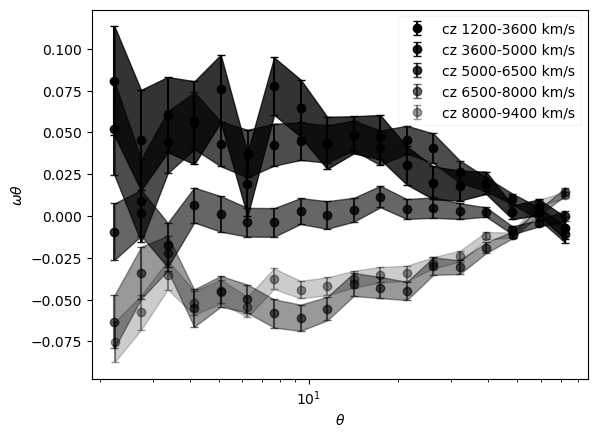

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import ascii

nbootstrap = int(100)
maxsep = int(80)
sample = 'all2MRS_noAGN'


cz_mins = [1200, 3600, 5000, 6500, 8000]
cz_maxs = [3600, 5000, 6500, 8000, 9400]
alphas = [1., .9, 0.8, 0.6, 0.4, 0.3]

fig, ax = plt.subplots()

for alpha, cz_min, cz_max in zip(alphas,cz_mins,cz_maxs):

    filename = f'../data/cross_treecorr_nq1_nmult100_nbs{nbootstrap}_{sample}_cz{cz_min}-{cz_max}.npz'

    data = np.load(filename)

    th = data.get('th')
    xi = data.get('xi_true')[0]
    #print(data.get('xi_bs')[0])
    varxi = np.std(data.get('xi_bs')[0], axis=0)
    #print(th)
    #print(xi)
    #print(varxi)

    ax.errorbar(th,xi,yerr=varxi,c='k',fmt='o',capsize=3,alpha=alpha,label=f'cz {cz_min}-{cz_max} km/s')
    #ax.scatter(-meanMag,int_mean,c=color,marker='o')
    ax.fill_between(th,y1=xi-varxi,y2=xi+varxi,color='k',alpha=alpha-.2)


ax.set_xscale('log')

ax.set_ylabel(r'$\omega\theta$')
ax.set_xlabel(r'$\theta$')

ax.legend(loc=0,framealpha=.2)

#plt.savefig(f'../plots/int_K_nq{nquant}_nbs{nbootstrap}_deflection.png')

plt.show()

